<a href="https://colab.research.google.com/github/Bertaalcolea/Collagen_studies/blob/main/dECM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import re

# Cargar archivo
df_raw = pd.read_excel("/content/dECM1_Berta (2).xlsx", header=None)

# 1) Detectar filas que marcan tiempos
mask_time = df_raw[0].astype(str).str.contains(r"^350\s*-\s*Time", na=False)
time_rows = df_raw.index[mask_time].tolist()

# 2) Extraer los tiempos en minutos desde el texto
def extraer_minutos(txt):
    m = re.search(r"\((\d+):(\d+):(\d+)\)", txt)
    if m:
        h, m_, s = map(int, m.groups())
        return h*60 + m_ + s/60
    return np.nan

tiempos_min = [extraer_minutos(df_raw.loc[r, 0]) for r in time_rows]

# 3) Extraer la cuadrícula completa A–H y 1–12 para CADA tiempo
registros = []

for i, start in enumerate(time_rows):
    t_min = tiempos_min[i]

    # La cuadrícula empieza SIEMPRE 5 filas después
    grid_start = start + 5

    # Filas A–H (8 filas)
    for fila in range(8):
        row_idx = grid_start + fila
        row_letter = df_raw.loc[row_idx, 1]

        if not isinstance(row_letter, str):
            continue

        for col in range(1, 13):  # columnas 1 a 12
            od = df_raw.loc[row_idx, col+1]  # +1 por desplazamiento en tu archivo
            if pd.isna(od):
                continue
            well = f"{row_letter}{col}"
            registros.append([well, t_min, od])

df_long = pd.DataFrame(registros, columns=["well", "time_min", "OD"])


In [53]:
print("Filas extraídas:", len(df_long))
print(df_long.head())
print(df_long.tail())

df_long["time_min"].unique()  # debería devolver ~120 tiempos


Filas extraídas: 4359
  well  time_min     OD
0   B4       0.2  0.169
1   B5       0.2  0.167
2   B6       0.2  0.169
3   C1       0.2  0.182
4   C2       0.2  0.175
     well  time_min     OD
4354   H2     120.2  0.504
4355   H3     120.2  0.513
4356   H4     120.2  0.379
4357   H5     120.2  0.484
4358   H6     120.2  0.426


array([  0.2,   1.2,   2.2,   3.2,   4.2,   5.2,   6.2,   7.2,   8.2,
         9.2,  10.2,  11.2,  12.2,  13.2,  14.2,  15.2,  16.2,  17.2,
        18.2,  19.2,  20.2,  21.2,  22.2,  23.2,  24.2,  25.2,  26.2,
        27.2,  28.2,  29.2,  30.2,  31.2,  32.2,  33.2,  34.2,  35.2,
        36.2,  37.2,  38.2,  39.2,  40.2,  41.2,  42.2,  43.2,  44.2,
        45.2,  46.2,  47.2,  48.2,  49.2,  50.2,  51.2,  52.2,  53.2,
        54.2,  55.2,  56.2,  57.2,  58.2,  59.2,  60.2,  61.2,  62.2,
        63.2,  64.2,  65.2,  66.2,  67.2,  68.2,  69.2,  70.2,  71.2,
        72.2,  73.2,  74.2,  75.2,  76.2,  77.2,  78.2,  79.2,  80.2,
        81.2,  82.2,  83.2,  84.2,  85.2,  86.2,  87.2,  88.2,  89.2,
        90.2,  91.2,  92.2,  93.2,  94.2,  95.2,  96.2,  97.2,  98.2,
        99.2, 100.2, 101.2, 102.2, 103.2, 104.2, 105.2, 106.2, 107.2,
       108.2, 109.2, 110.2, 111.2, 112.2, 113.2, 114.2, 115.2, 116.2,
       117.2, 118.2, 119.2, 120.2])

In [54]:
# --- MAPEAR WELL → CONDICIÓN ---

well_cond_map = {
    # CONTROL
    "B4": "Control", "B5": "Control", "B6": "Control",

    # BOVINE
    "C1": "Bov no pH", "C2": "Bov no pH", "C3": "Bov no pH",
    "C4": "Bov pH7",   "C5": "Bov pH7",   "C6": "Bov pH7",

    # RAT
    "D1": "Rat no pH", "D2": "Rat no pH", "D3": "Rat no pH",
    "D4": "Rat pH7",   "D5": "Rat pH7",   "D6": "Rat pH7",

    # PAA 24h
    "E1": "PAA 24h no pH", "E2": "PAA 24h no pH", "E3": "PAA 24h no pH",
    "E4": "PAA 24h pH7",   "E5": "PAA 24h pH7",   "E6": "PAA 24h pH7",

    # NO PAA 24h
    "F1": "No PAA 24h no pH", "F2": "No PAA 24h no pH", "F3": "No PAA 24h no pH",
    "F4": "No PAA 24h pH7",   "F5": "No PAA 24h pH7",   "F6": "No PAA 24h pH7",

    # PAA 48h
    "G1": "PAA 48h no pH", "G2": "PAA 48h no pH", "G3": "PAA 48h no pH",
    "G4": "PAA 48h pH7",   "G5": "PAA 48h pH7",   "G6": "PAA 48h pH7",

    # NO PAA 48h
    "H1": "No PAA 48h no pH", "H2": "No PAA 48h no pH", "H3": "No PAA 48h no pH",
    "H4": "No PAA 48h pH7",   "H5": "No PAA 48h pH7",   "H6": "No PAA 48h pH7",
}

df_long["cond"] = df_long["well"].map(well_cond_map)

print(df_long.head())
print(df_long["cond"].unique())


  well  time_min     OD       cond
0   B4       0.2  0.169    Control
1   B5       0.2  0.167    Control
2   B6       0.2  0.169    Control
3   C1       0.2  0.182  Bov no pH
4   C2       0.2  0.175  Bov no pH
['Control' 'Bov no pH' 'Bov pH7' 'Rat no pH' 'Rat pH7' 'PAA 24h no pH'
 'PAA 24h pH7' 'No PAA 24h no pH' 'No PAA 24h pH7' 'PAA 48h no pH'
 'PAA 48h pH7' 'No PAA 48h no pH' 'No PAA 48h pH7']


In [55]:
summary_raw = (
    df_long.groupby(["time_min", "cond"])
    .agg(OD_mean=("OD","mean"),
         OD_sd=("OD","std"),
         n=("OD","count"))
    .reset_index()
)

print(summary_raw.head())
print(summary_raw["cond"].unique())


   time_min              cond   OD_mean     OD_sd  n
0       0.2         Bov no pH  0.179333  0.003786  3
1       0.2           Bov pH7  0.195000  0.008888  3
2       0.2           Control  0.168333  0.001155  3
3       0.2  No PAA 24h no pH  0.365333  0.047057  3
4       0.2    No PAA 24h pH7  0.324000  0.014731  3
['Bov no pH' 'Bov pH7' 'Control' 'No PAA 24h no pH' 'No PAA 24h pH7'
 'No PAA 48h no pH' 'No PAA 48h pH7' 'PAA 24h no pH' 'PAA 24h pH7'
 'PAA 48h no pH' 'PAA 48h pH7' 'Rat no pH' 'Rat pH7']


In [56]:
orden_leyenda = [
    "Rat no pH", "Rat pH7",
    "Bov no pH", "Bov pH7",
    "PAA 24h no pH", "PAA 24h pH7",
    "No PAA 24h no pH", "No PAA 24h pH7",
    "PAA 48h no pH", "PAA 48h pH7",
    "No PAA 48h no pH", "No PAA 48h pH7",
    "Control"
]


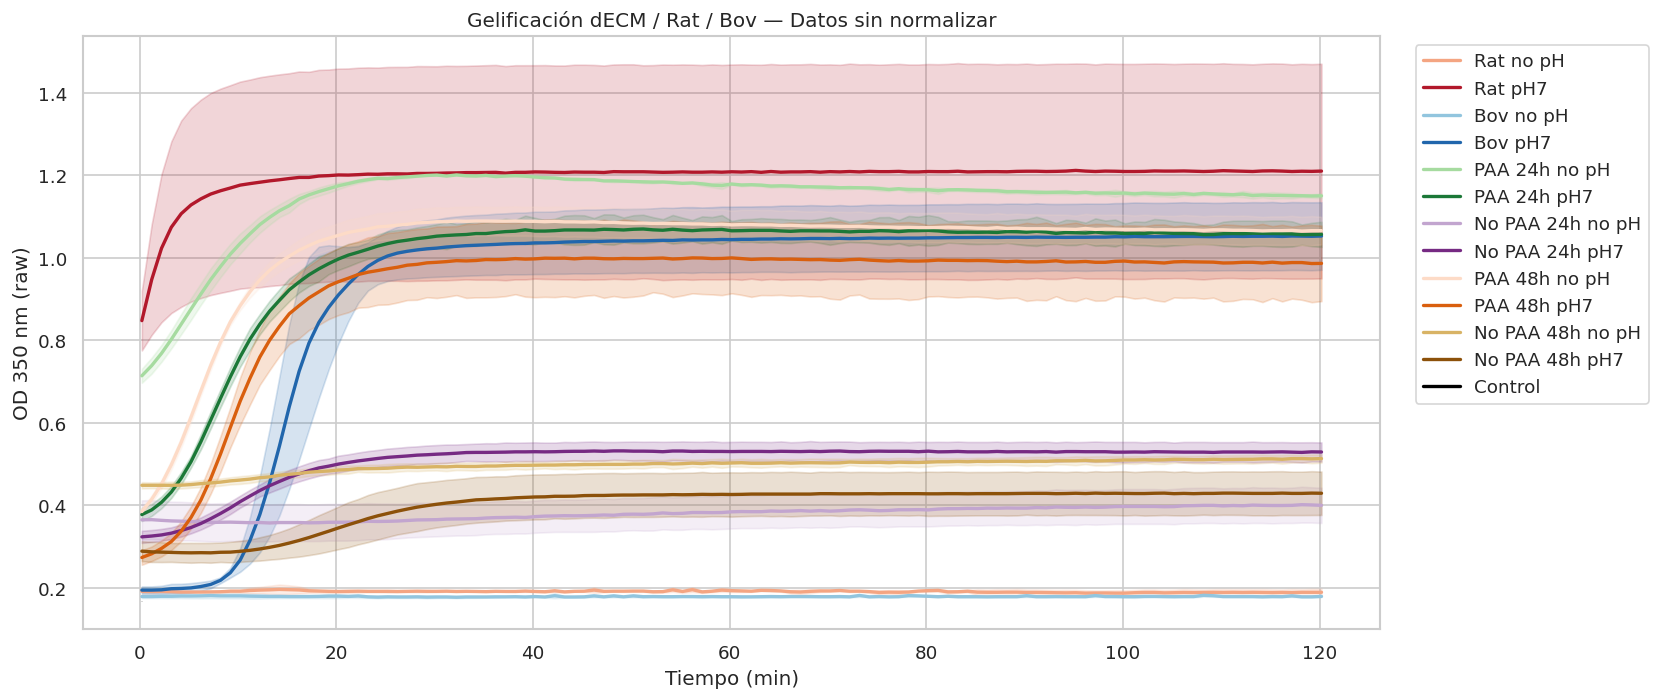

In [57]:
plt.figure(figsize=(14,6))

for cond in orden_leyenda:
    dfc = summary_raw[summary_raw["cond"] == cond]
    if dfc.empty:
        continue  # por si alguna condición no existe

    plt.plot(
        dfc["time_min"],
        dfc["OD_mean"],
        color=colores[cond],
        label=cond,
        linewidth=2
    )
    plt.fill_between(
        dfc["time_min"],
        dfc["OD_mean"] - dfc["OD_sd"],
        dfc["OD_mean"] + dfc["OD_sd"],
        color=colores[cond],
        alpha=0.18
    )

plt.title("Gelificación dECM / Rat / Bov — Datos sin normalizar")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm (raw)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [60]:
# --- Normalización por pozo ---

df_norm = df_long.copy()

norm_values = (
    df_norm.groupby("well")["OD"]
    .agg(["min", "max"])
    .rename(columns={"min": "OD_min", "max": "OD_max"})
)

df_norm = df_norm.merge(norm_values, on="well")
df_norm["OD_norm"] = (df_norm["OD"] - df_norm["OD_min"]) / (df_norm["OD_max"] - df_norm["OD_min"])
df_norm["OD_norm"] = df_norm["OD_norm"].clip(0, 1)


In [63]:
# df_long viene del parsing del Excel (well, time_min, time_str, OD)

# 1) baseline y plateau por well
stats_well = (
    df_long
    .groupby("well")
    .agg(
        baseline=("OD", lambda s: s.iloc[0:3].mean()),      # media primeras 3 medidas
        plateau =("OD", lambda s: s.iloc[-10:].mean())      # media últimas 10
    )
    .reset_index()
)

# 2) crear OD normalizado por well
df_norm = (
    df_long
    .merge(stats_well, on="well")
    .assign(
        OD_norm=lambda d: (d["OD"] - d["baseline"]) / (d["plateau"] - d["baseline"])
    )
)

print(df_norm.head())
print(df_norm.columns)


  well  time_min     OD       cond  baseline  plateau       OD_norm
0   B4       0.2  0.169    Control  0.169000   0.1690           NaN
1   B5       0.2  0.167    Control  0.167000   0.1670           NaN
2   B6       0.2  0.169    Control  0.169000   0.1690           NaN
3   C1       0.2  0.182  Bov no pH  0.181667   0.1805 -2.857143e-01
4   C2       0.2  0.175  Bov no pH  0.175000   0.1794  6.308085e-15
Index(['well', 'time_min', 'OD', 'cond', 'baseline', 'plateau', 'OD_norm'], dtype='object')


In [65]:
summary_norm = (
    df_norm
    .groupby(["time_min", "cond"])
    .agg(
        OD_mean=("OD_norm", "mean"),
        OD_sd  =("OD_norm", "std"),
        n      =("OD_norm", "count")
    )
    .reset_index()
)

print("shape summary_norm:", summary_norm.shape)
print("conds en summary_norm:", summary_norm["cond"].unique())
summary_norm.head()


shape summary_norm: (1453, 5)
conds en summary_norm: ['Bov no pH' 'Bov pH7' 'Control' 'No PAA 24h no pH' 'No PAA 24h pH7'
 'No PAA 48h no pH' 'No PAA 48h pH7' 'PAA 24h no pH' 'PAA 24h pH7'
 'PAA 48h no pH' 'PAA 48h pH7' 'Rat no pH' 'Rat pH7']


,time_min,cond,OD_mean,OD_sd,n
0,0.2,Bov no pH,-0.011905,0.268055,3
1,0.2,Bov pH7,-0.000240,0.000416,3
2,0.2,Control,NaN,NaN,0
3,0.2,No PAA 24h no pH,0.009728,0.010537,3
4,0.2,No PAA 24h pH7,-0.010858,0.004362,3


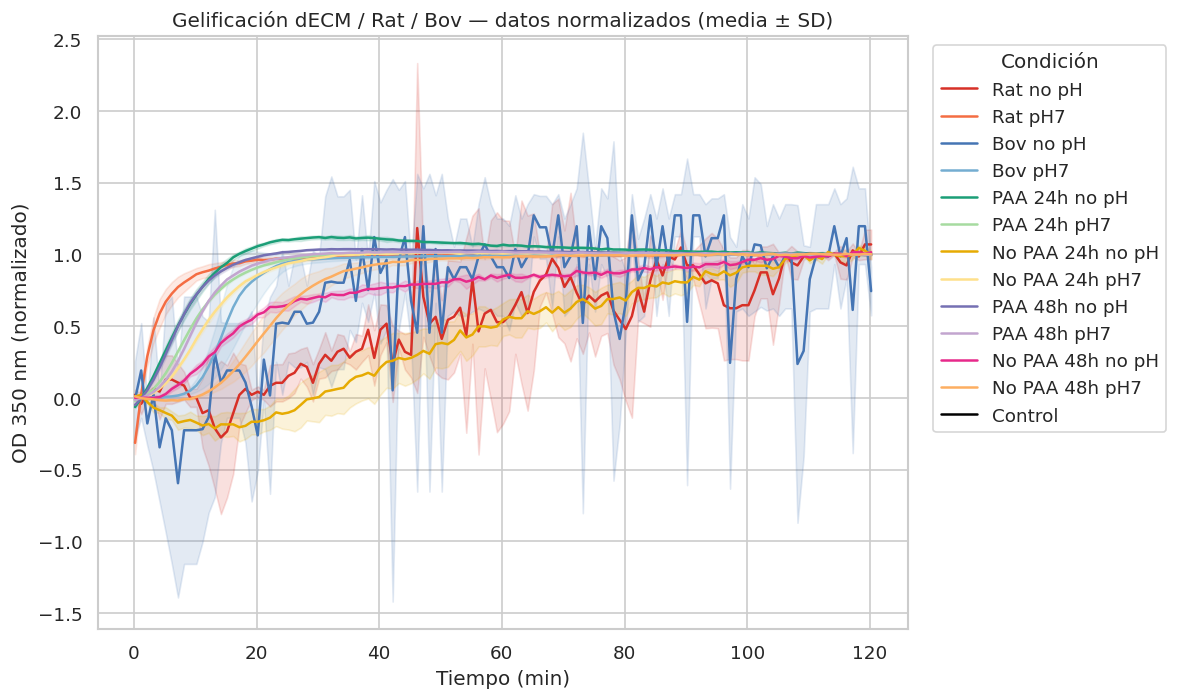

In [66]:
plt.figure(figsize=(10, 6))

for cond in orden_leyenda:
    sub = summary_norm[summary_norm["cond"] == cond]
    if sub.empty:
        continue

    color = colores.get(cond, "grey")

    # curva media normalizada
    plt.plot(
        sub["time_min"],
        sub["OD_mean"],
        label=cond,
        color=color
    )

    # banda de ±SD
    plt.fill_between(
        sub["time_min"],
        sub["OD_mean"] - sub["OD_sd"],
        sub["OD_mean"] + sub["OD_sd"],
        color=color,
        alpha=0.15
    )

plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm (normalizado)")
plt.title("Gelificación dECM / Rat / Bov — datos normalizados (media ± SD)")
plt.legend(title="Condición", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()
